<img src='02_logestic_reg_pic.PNG'>

#### The logistic function transforms real-valued input to an output number y between 0 and 1, interpreted as probability the input object belongs to the positive class, given its input features ($x_0,x_1,x_2,...,x_n$)

<img src='ex_1.PNG'>

<img src='ex_2.PNG' >



### if any data with y > 0.5 is in blue class and other wise is in red class

### Regularization term
Regularization does NOT improve the performance on the data set that the algorithm used to learn the model parameters (feature weights). However, it can improve the generalization performance, i.e., the performance on new, unseen data, which is exactly what we want.

In intuitive terms, we can think of regularization as a penalty against complexity. Increasing the regularization strength penalizes "large" weight coefficients -- our goal is to prevent that our model picks up "peculiarities," "noise," or "imagines a pattern where there is none."

Again, we don't want the model to memorize the training dataset, we want a model that generalizes well to new, unseen data.

In [1]:
%matplotlib notebook
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler

In [2]:
fruits=pd.read_table('fruit_dat_with_colors.txt')
y_fruits_2d = fruits['fruit_label'] == 1
X_fruits_2d = fruits[['height','width']]
X_fruits_2d = X_fruits_2d.values
y_fruits_2d = y_fruits_2d.values
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d,y_fruits_2d , random_state=0)

In [3]:
y_fruits_2d

array([ True,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [4]:
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [5]:
def logistic_pridector_2d(X_train, X_test, y_train, y_test,class_1,class_2,x_min, x_max,y_min, y_max,ax,C, clf):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    mesh_step_size=0.01
    ax.set_xlabel('height')
    ax.set_ylabel('width')
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    patch0 = mpatches.Patch(color='#FF0000', label=class_1)
    patch1 = mpatches.Patch(color='#00FF00', label=class_2)
    ax.legend(handles=[patch0, patch1])
    ax.scatter(x=X_train[:,0],y=X_train[:,1],c=y_train , marker='o',s=50,cmap=cmap_bold,edgecolor = 'black')
    ax.scatter(x=X_test[:,0],y=X_test[:,1],c=y_test , marker='^',s=50,cmap=cmap_bold,edgecolor = 'black')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    test_score=clf.score(X_test,y_test)
    train_score=clf.score(X_train,y_train)
    title='train-score:{:.2f} , test-score:{:.2f} \n C: {:.2f}'.format(train_score,test_score,C)
    ax.set_title(title)



<IPython.core.display.Javascript object>


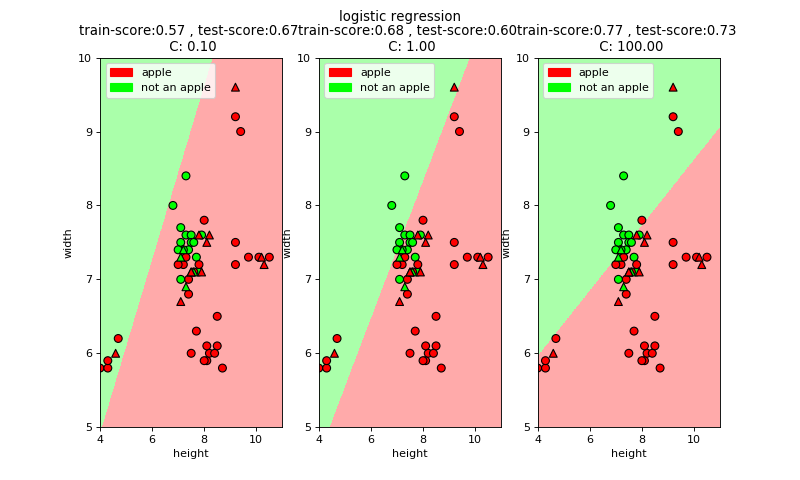

G:\SetupDir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\SetupDir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\SetupDir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
fig, subaxes = plt.subplots(1,3,figsize=(10,6))
fig.suptitle('logistic regression')
for ax,c in zip(subaxes,[0.1, 1, 100]):
    clf = LogisticRegression(C=c).fit(X_train,y_train)
    logistic_pridector_2d(X_train, X_test, y_train, y_test,class_1='apple',
                      class_2='not an apple',x_min=4,x_max=11,y_min=5,y_max=10,ax=ax,C=c, clf=clf)
    